# Gibbs Free Energy

```
Created for ME 4443 @ LSU (Spring 2018).
```

In [1]:
# libraries used
%matplotlib notebook

import cantera as ct
import numpy as np
import csv

import matplotlib.pyplot as plt

In [2]:
#### EDIT HERE ####

pres = 101325.0      # pressure
temp = 1000.         # temperature

# create a cantera object to work with
gas = ct.Solution('gri30.xml')

### Vary Composition of Mixture

In [3]:
# initialize variables to store results

x = np.arange(0.,1.01,.025)
npoints = len(x)

co2X = np.zeros(npoints)
h2X = np.zeros(npoints)
coX = np.zeros(npoints)
h2oX = np.zeros(npoints)

gX = np.zeros(npoints)

for i, xi in enumerate(x):

    # balance water-gas shift reaction: CO2 + H2 <=> CO + H2O
    co2X[i] = .5*(1.-xi)
    h2X[i] = .5*(1.-xi)
    coX[i] = .5*xi
    h2oX[i] = .5*xi
    comp = 'CO2:%4.3f, H2:%4.3f, CO:%4.3f, H2O:%4.3f' % \
        (co2X[i],h2X[i],coX[i],h2oX[i])
    print(comp)

    gas.TPX = (temp, pres, comp,)
    gX[i] = gas.gibbs_mass

CO2:0.500, H2:0.500, CO:0.000, H2O:0.000
CO2:0.487, H2:0.487, CO:0.013, H2O:0.013
CO2:0.475, H2:0.475, CO:0.025, H2O:0.025
CO2:0.463, H2:0.463, CO:0.038, H2O:0.038
CO2:0.450, H2:0.450, CO:0.050, H2O:0.050
CO2:0.438, H2:0.438, CO:0.062, H2O:0.062
CO2:0.425, H2:0.425, CO:0.075, H2O:0.075
CO2:0.412, H2:0.412, CO:0.088, H2O:0.088
CO2:0.400, H2:0.400, CO:0.100, H2O:0.100
CO2:0.388, H2:0.388, CO:0.113, H2O:0.113
CO2:0.375, H2:0.375, CO:0.125, H2O:0.125
CO2:0.362, H2:0.362, CO:0.138, H2O:0.138
CO2:0.350, H2:0.350, CO:0.150, H2O:0.150
CO2:0.338, H2:0.338, CO:0.163, H2O:0.163
CO2:0.325, H2:0.325, CO:0.175, H2O:0.175
CO2:0.312, H2:0.312, CO:0.188, H2O:0.188
CO2:0.300, H2:0.300, CO:0.200, H2O:0.200
CO2:0.287, H2:0.287, CO:0.213, H2O:0.213
CO2:0.275, H2:0.275, CO:0.225, H2O:0.225
CO2:0.262, H2:0.262, CO:0.238, H2O:0.238
CO2:0.250, H2:0.250, CO:0.250, H2O:0.250
CO2:0.237, H2:0.237, CO:0.263, H2O:0.263
CO2:0.225, H2:0.225, CO:0.275, H2O:0.275
CO2:0.212, H2:0.212, CO:0.288, H2O:0.288
CO2:0.200, H2:0.

equilibrium result (full kinetics)

In [4]:
gas.equilibrate('TP', solver='gibbs')
CO_index = gas.species_index('CO')
gas.X[CO_index]
gas()


  gri30:

       temperature            1000  K
          pressure          101325  Pa
           density        0.280868  kg/m^3
  mean mol. weight         23.0473  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -7.0391e+06       -1.622e+08     J
   internal energy     -7.3999e+06       -1.705e+08     J
           entropy           10268        2.367e+05     J/K
    Gibbs function     -1.7307e+07       -3.989e+08     J
 heat capacity c_p          1736.4        4.002e+04     J/K
 heat capacity c_v          1375.7        3.171e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2       0.271202        0.0237213         -18.8104
                 H    1.18187e-09      5.16872e-11         -9.40522
                OH    2.19822e-12      1.62214e-12          -46.022
               H2O        

### Results

<IPython.core.display.Javascript object>


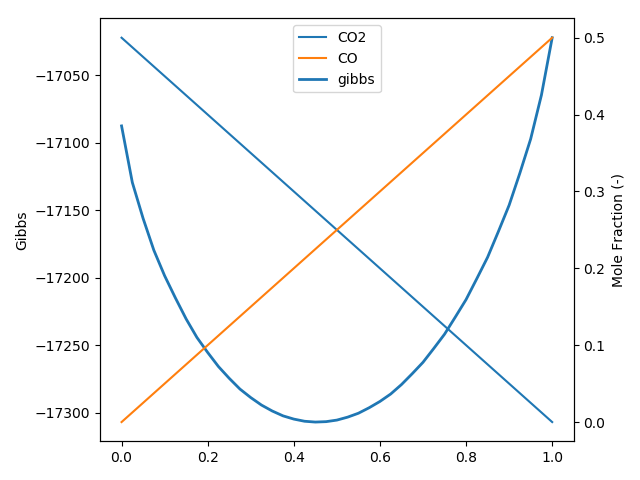

In [5]:
L4 = plt.plot(x, 1e-3*gX,label='gibbs', lw=2)
plt.ylabel('Gibbs')
plt.twinx()
L1 = plt.plot(x,co2X,label='CO2')
L2 = plt.plot(x,coX,label='CO')
#L3 = plt.plot(x,h2oX,label='H2O')
plt.xlabel('x (-)')
plt.ylabel('Mole Fraction (-)')
plt.tight_layout()
_ = plt.legend(L1+L2+L4, [line.get_label() for line in L1+L2+L4], loc='upper center')    